In [549]:
import pandas as pd
import numpy as np

In [550]:
pd.options.mode.copy_on_write = "warn"

# Exploratory Data Analysis with Pandas

In [ ]:
# import raw data
movies = pd.read_csv('data\\movies\\movies_2.csv') # NOTE escaping the '\', because there was a warning

In [552]:
movies.head()

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,93.0,5.9,73638.0,"After a single, career-minded woman is left on..."
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0,An old Jewish woman and her African-American c...
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,100.0,7.2,91415.0,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,145.0,7.2,91415.0,The biography of Ron Kovic. Paralyzed in the V...
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,107.0,7.5,101702.0,"An Iowa corn farmer, hearing voices, interpret..."


# Describe the raw data

In [553]:
movies.shape

(616, 11)

In [554]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
 10  Summary       496 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.1+ KB


* MovieID: identifier of the data set
* Title: movie title
* MPAA Rating: ...

In [555]:
# TODO - continue; how to describe data in a Jupyter Notebook? Checkout Notebooks on kaggle
# REVIEW - Should I fix the data types while importing or later on? The earlier the better? I prefer to have everything in one place and each step take care of one thang;
#  import: read all information from input file
#  data cleaning / standardizing 

In [556]:
# access the data types with dtype, which is a pandas series of data types
print(type(movies.dtypes))
print(movies.dtypes['Title'])
print(movies.dtypes['Release Date'])
print(movies.dtypes['Summary'])

<class 'pandas.core.series.Series'>
object
object
object


## NaN values

In [557]:
# NaN values
movies.isna().sum()

MovieID           0
Title             1
MPAA Rating       1
Budget            1
Gross             1
Release Date      1
Genre             1
Runtime           1
Rating          108
Rating Count    108
Summary         120
dtype: int64

In [558]:
movies[movies.Title.isna()]

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
615,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [559]:
movies[movies['Rating'].isna()].head()

,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
486,487,Fast & Furious 6,PG-13,160000000.0,7.886798e+08,2013-05-06,Action,130.0,NaN,NaN,NaN
489,490,Oz: The Great and Powerful,PG,200000000.0,4.918685e+08,2013-03-07,Drama,130.0,NaN,NaN,NaN
510,511,Maleficent,PG,180000000.0,7.585398e+08,2014-05-28,Fantasy,97.0,NaN,NaN,NaN
511,512,The Amazing Spider-Man 2,PG-13,200000000.0,7.057174e+08,2014-04-16,Action,142.0,NaN,NaN,NaN
512,513,Transformers: Age of Extinction,PG-13,210000000.0,1.091405e+09,2014-06-25,Action,165.0,NaN,NaN,NaN


In [560]:
# convert NaN to data not available, to differ between missing data and calculation errors 
# TODO - finish this step
#pd.NA

## Duplicates

In [561]:
movies.duplicated().sum()

np.int64(0)

## Save raw data
Save raw data, to easily get back to it

In [562]:
# TODO - saving raw data does not make sense without fixing the issues
# NOTE - index should not be reset on the new data frame!
movies_raw = movies.copy()

# Make Data Frame easier to handle

## Reset Column Titles

In [563]:
# are there any spaces in the column titles?
cols = pd.Series(movies.columns)
mapper = {col:col.replace(' ','_').lower() for col in cols}

movies.rename(columns=mapper,inplace=True)

## Set index

In [564]:
movies.set_index(['movieid'], inplace=True)

## Get rid of irrelevant data

In [565]:
movies.drop(columns=['summary'], inplace=True)

# Data cleaning

## Handle NaN values

Drop rows with NA in title, because these do not make sense.

In [566]:
movies = movies.dropna(subset=['title'])

Fill NA in Rating and Rating Count with the median, in order to ...

Use the Median, since distributions are skewed.

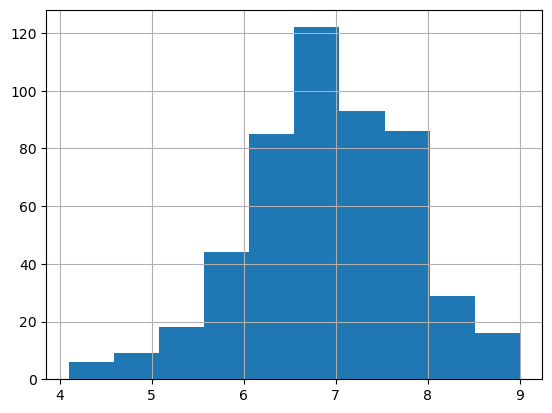

In [567]:
movies.rating.hist();

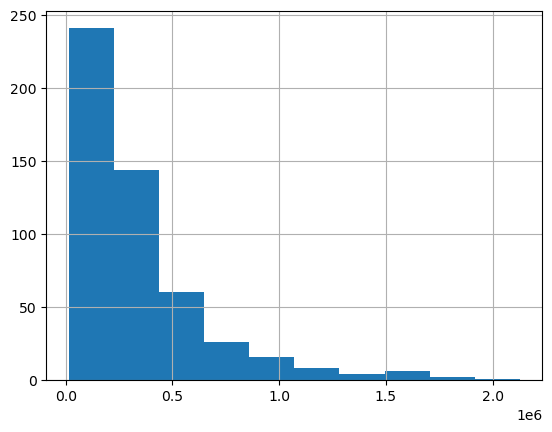

In [568]:
movies.rating_count.hist();

In [569]:
movies = movies.fillna({'rating': movies['rating'].median()})
movies = movies.fillna({'rating_count': movies['rating_count'].median()})

## Data type conversions

In [570]:
# simple conversions
movies.gross = movies.gross.astype('int')
movies.budget = movies.budget.astype('int')
movies.runtime = movies.runtime.astype('int')
movies.rating_count = movies.rating_count.astype('int')

In [571]:
movies[movies.title.str.contains('Avengers')].budget

movieid
472    220000000
535    280000000
595    400000000
615    356000000
Name: budget, dtype: int64

In [572]:
# NOTE - pandas recommendation to convert strings
movies.title = movies.title.astype(pd.StringDtype())
# movies.summary = movies.summary.astype(pd.StringDtype())

What's the use of categorical data this data type? 
  - some built-in functions can be used to deal with categorical data, i.e. sorting, renaming categories etc.
  - it's faster than a object/string data type: #categories + len(series) < constant * len(series); not sure though if categorical data may really slow down pandas

In [573]:
# convert categorical data
movies.genre = movies.genre.astype(pd.CategoricalDtype(ordered=False))
movies.mpaa_rating = movies.mpaa_rating.astype(pd.CategoricalDtype(ordered=True))

In [574]:
# convert Release Date to datetime
movies.release_date = pd.to_datetime(movies.release_date, format='%Y-%m-%d')
movies['release_date'] = pd.to_datetime(movies['release_date'])#, format='%Y-%m-%d')

# set the datetime accuracy. pandas uses ns, but the accuracy should not be higher than given in the raw data.
movies.release_date = movies.release_date.values.astype('datetime64[D]') # NOTE in order to use astype, the values of the pandas series have to be accessed 
# movies.release_date = movies.release_date.dt.floor('D') # NOTE dt can be used in pandas DateTime series; the line is not needed to convert the data type

In [575]:
# show final data types
# NOTE - object usually refers to mixed data types in a column, however it also shows for non-pd-strings
print(movies.dtypes)

title           string[python]
mpaa_rating           category
budget                   int64
gross                    int64
release_date     datetime64[s]
genre                 category
runtime                  int64
rating                 float64
rating_count             int64
dtype: object


In [576]:
movies.head()

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
1,Look Who's Talking,PG-13,7500000,296000000,1989-10-12,Romance,93,5.9,73638
2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99,7.4,91075
3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100,7.2,91415
4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145,7.2,91415
5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107,7.5,101702


## standardize

In [577]:
# TODO For numerical values, make sure all values have a certain measurement unit; checkout pandas units

In [578]:
# For strings, make sure all values are either in lower or upper case.
movies.title = movies.title.apply(lambda x: x.lower())
movies.genre = movies.genre.apply(lambda x: x.lower())
movies.mpaa_rating = movies.mpaa_rating.apply(lambda x: x.lower())

In [579]:
# NOTE - cat allows to do operations on categories 
movies.genre.cat.categories

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'mystery', 'romance',
       'science fiction', 'thriller', 'war', 'western'],
      dtype='object')

In [580]:
movies.mpaa_rating.cat.categories

Index(['g', 'pg', 'pg-13', 'r'], dtype='object')

In [581]:
# NOTE - order categories in order to use comparison operator
# TODO actually a standardizing step
if 'nc-17' not in movies.mpaa_rating.cat.categories:
    movies.mpaa_rating = movies.mpaa_rating.cat.add_categories('nc-17')
    movies.mpaa_rating = movies.mpaa_rating.cat.reorder_categories(['g','pg-13', 'pg', 'r', 'nc-17'])
movies.mpaa_rating.sort_values()#.value_counts()

movieid
66     g
192    g
150    g
287    g
454    g
      ..
69     r
347    r
496    r
158    r
58     r
Name: mpaa_rating, Length: 615, dtype: category
Categories (5, object): ['g' < 'pg-13' < 'pg' < 'r' < 'nc-17']

# Maybe useful stuff

In [582]:
# create in order to use autocompletion for categorical data
class mpaa_rating_categories:
    pass
mpaa_rating_categories.r = 'r'
# genre_categories = pd.DataFrame({'categories' : movies.genre.unique()}, dtype='category')
print(mpaa_rating_categories.r)

r


# Explore Data

In [583]:
# TODO - separate file for data exploration? probably not important in this project, but in larger ones it might be 

In [584]:
movies.head()

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
1,look who's talking,pg-13,7500000,296000000,1989-10-12,romance,93,5.9,73638
2,driving miss daisy,pg,7500000,145793296,1989-12-13,comedy,99,7.4,91075
3,turner & hooch,pg,13000000,71079915,1989-07-28,crime,100,7.2,91415
4,born on the fourth of july,r,14000000,161001698,1989-12-20,war,145,7.2,91415
5,field of dreams,pg,15000000,84431625,1989-04-21,drama,107,7.5,101702


In [585]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   title         615 non-null    object       
 1   mpaa_rating   615 non-null    category     
 2   budget        615 non-null    int64        
 3   gross         615 non-null    int64        
 4   release_date  615 non-null    datetime64[s]
 5   genre         615 non-null    category     
 6   runtime       615 non-null    int64        
 7   rating        615 non-null    float64      
 8   rating_count  615 non-null    int64        
dtypes: category(2), datetime64[s](1), float64(1), int64(4), object(1)
memory usage: 40.5+ KB


In [586]:
# MPAA rating
movies.mpaa_rating.value_counts()

mpaa_rating
pg-13    285
pg       161
r        142
g         27
nc-17      0
Name: count, dtype: int64

In [587]:
# genre
movies.genre.value_counts()

genre
action             110
comedy              99
animation           87
drama               66
thriller            41
science fiction     37
adventure           30
family              29
romance             28
fantasy             27
crime               17
horror              14
mystery             11
war                  9
western              6
history              4
Name: count, dtype: int64

In [588]:
# basic statistics
movies.describe()

,budget,gross,release_date,runtime,rating,rating_count
count,6.150000e+02,6.150000e+02,615,615.000000,615.000000,6.150000e+02
mean,9.491710e+07,4.453221e+08,2004-08-14 02:22:49,118.642276,6.914309,3.220442e+05
min,6.000000e+04,5.300000e+07,1989-04-21 00:00:00,79.000000,4.100000,1.491800e+04
25%,4.000000e+07,2.158939e+08,1996-11-19 00:00:00,102.000000,6.500000,1.503800e+05
50%,8.000000e+07,3.510404e+08,2004-07-23 00:00:00,117.000000,6.900000,2.403470e+05
75%,1.400000e+08,5.851766e+08,2012-06-13 12:00:00,132.000000,7.400000,3.814775e+05
max,4.000000e+08,2.796000e+09,2019-12-09 00:00:00,201.000000,9.000000,2.127228e+06
std,6.748114e+07,3.394075e+08,NaN,22.252376,0.807794,2.944014e+05


## Outliers

### Rating

<Axes: >

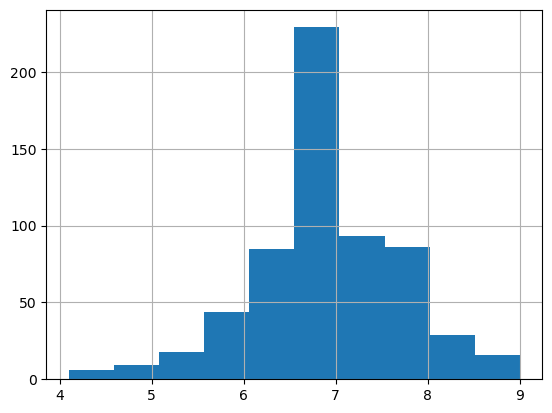

In [589]:
movies.rating.hist()

In [590]:
def outliers(series: pd.Series) -> pd.Index:
    '''
    Get indices of values outside of the inner quartile range.
    '''
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    threshold = 1.5*(q3-q1)
    return np.logical_not(series.between(q1-threshold,q3+threshold))

rating_outliers = movies[outliers(movies.rating)].sort_values(by='rating')
rating_outliers

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
427,the last airbender,pg,150000000,318502923,2010-06-30,adventure,103,4.1,139750
279,spy kids 3-d: game over,pg,38000000,197011982,2003-07-25,family,84,4.2,50809
414,2012,pg-13,200000000,769653595,2009-10-10,adventure,158,4.3,28949
439,alvin and the chipmunks: chipwrecked,g,75000000,342695435,2011-12-14,family,87,4.3,28949
228,nutty professor ii: the klumps,pg-13,84000000,123307945,2000-07-27,comedy,106,4.4,46222
403,alvin and the chipmunks: the squeakquel,pg,75000000,443140005,2009-12-21,family,88,4.5,40285
245,dr. dolittle 2,pg,70000000,176104344,2001-06-22,comedy,87,4.7,39656
381,marley and me,pg,60000000,247800000,2008-12-25,drama,115,4.7,252223
402,the twilight saga: new moon,pg-13,50000000,709827462,2009-03-15,romance,130,4.7,252223


## EDA Exercises


### 1 - Show the movies with more than 7 in Rating & greater than 50 million Gross

In [591]:
movies[(movies.rating > 7.0) & (movies.gross > 50000000)].sort_values(['rating', 'gross'])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
143,the birdcage,r,31000000,185260553,1996-03-08,comedy,117,7.1,74466
113,stargate,pg-13,55000000,196567262,1994-10-27,science fiction,121,7.1,167516
189,the prince of egypt,pg,70000000,218613188,1998-12-15,animation,99,7.1,110340
260,the ring,pg-13,48000000,249348933,2002-10-18,horror,115,7.1,303397
181,shakespeare in love,r,25000000,289317794,1998-12-11,history,122,7.1,203939
...,...,...,...,...,...,...,...,...,...
100,pulp fiction,r,8000000,213928762,1994-09-10,thriller,154,8.9,1690474
84,schindler's list,r,22000000,321365567,1993-11-29,history,195,8.9,1117322
99,jurassic park iii,pg-13,93000000,368800000,2001-07-16,thriller,92,8.9,1690474


In [592]:
# using where
movies.where((movies.rating > 7.0) & (movies.gross > 50000000)).sort_values(['rating', 'gross'])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
143,the birdcage,r,31000000.0,185260553.0,1996-03-08,comedy,117.0,7.1,74466.0
113,stargate,pg-13,55000000.0,196567262.0,1994-10-27,science fiction,121.0,7.1,167516.0
189,the prince of egypt,pg,70000000.0,218613188.0,1998-12-15,animation,99.0,7.1,110340.0
260,the ring,pg-13,48000000.0,249348933.0,2002-10-18,horror,115.0,7.1,303397.0
181,shakespeare in love,r,25000000.0,289317794.0,1998-12-11,history,122.0,7.1,203939.0
...,...,...,...,...,...,...,...,...,...
611,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
613,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### 2 Show the movies with ...
* more than 7 in Rating & 
* greater than 50 million Gross & 
* MPAA Rating as PG

In [593]:
# NOTE - categorical data: how to access conveniently?
#   not possible with built-in cat functions according to documentation
#   make a dict from the categories? does not make sense
mask = (movies.rating > 7.0) & (movies.gross > 50000000) & (movies.mpaa_rating == 'pg')
movies[mask].sort_values(['rating', 'gross'], ascending=[False,True])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
107,star trek: generations,pg,38000000,120000000,1994-11-17,science fiction,118,8.5,869127
412,up,pg,175000000,735099082,2009-05-13,animation,96,8.2,867393
8,dead poets society,pg,16400000,235860116,1989-06-02,drama,129,8.1,382002
186,the truman show,pg,60000000,264118201,1998-06-04,comedy,103,8.1,859224
429,how to train your dragon,pg,165000000,494878759,2010-03-05,animation,98,8.1,624128
81,groundhog day,pg,14600000,70906973,1993-02-11,comedy,101,8.0,549538
46,teenage mutant ninja turtles ii,pg,25000000,78600000,1991-03-22,action,88,8.0,397467
47,beauty and the beast,pg,25000000,377350553,1991-11-13,animation,84,8.0,397467
305,the incredibles,pg,92000000,631442092,2004-11-05,animation,115,8.0,617102


### 3 - Show the count of **Animation** movies with **more than 7 in Rating** 
use the shape() method

In [594]:
movies[(movies.genre=='animation') & (movies.rating>7.0)].shape

(39, 9)

### 4 - Show the **top 5** movies based on **Budget**

In [595]:
%%timeit
# use nlargest, should be a bit faster
movies.nlargest(5,columns='budget');

1.36 ms ± 231 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [596]:
%%timeit
# this is even faster?! or maybe because of the accessing function
movies.sort_values('budget', ascending=False).iloc[:5,:];

550 μs ± 66.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [597]:
%%timeit
# this is even faster?! or maybe because of the accessing function
movies.sort_values('budget', ascending=False).head(5);

572 μs ± 123 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### 5 - Show the **top 5 Comedy** movies by **Rating**

In [598]:
movies[movies.genre=='comedy'].sort_values('rating',ascending=False).iloc[:5]

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
112,forrest gump,pg-13,55000000,677945399,1994-07-06,comedy,142,8.8,1657851
186,the truman show,pg,60000000,264118201,1998-06-04,comedy,103,8.1,859224
81,groundhog day,pg,14600000,70906973,1993-02-11,comedy,101,8.0,549538
255,"monsters, inc.",g,115000000,562816256,2001-11-01,comedy,92,8.0,758349
317,the 40 year old virgin,r,26000000,109449237,2005-08-11,comedy,116,7.7,500448


### 6 - **Top 5** movie names by **Rating**

In [599]:
movies[['title','rating']].sort_values(by='rating', ascending=False).head(5)

,title,rating
movieid,,
394,the dark knight,9.0
99,jurassic park iii,8.9
100,pulp fiction,8.9
84,schindler's list,8.9
288,the lord of the rings: the return of the king,8.9


### 7 - **Top 3 high Gross Romance** movies released **after 1999** (typecast it to datetime)


In [600]:
mask = (movies.genre == 'romance') & (movies.release_date>=pd.to_datetime('01.01.2000'))
# movies[mask].sort_values('gross', ascending=False).head(3)
movies[mask].nlargest(3, 'gross')

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
465,the twilight saga: breaking dawn - part 2,pg-13,120000000,829000000,2012-11-13,romance,115,5.5,218357
443,the twilight saga: breaking dawn - part 1,pg-13,110000000,712171856,2011-03-15,romance,117,4.9,211592
402,the twilight saga: new moon,pg-13,50000000,709827462,2009-03-15,romance,130,4.7,252223


### 8 - How many of each **Genre** are present in the DataFrame? (use value_counts() method which applies to Series, not DataFrame)

In [601]:
movies.genre.value_counts()

genre
action             110
comedy              99
animation           87
drama               66
thriller            41
science fiction     37
adventure           30
family              29
romance             28
fantasy             27
crime               17
horror              14
mystery             11
war                  9
western              6
history              4
Name: count, dtype: int64

### 9 - **Top 5 most expensive movies** released after **1999** (measured by Budget)

In [602]:
# movies[movies.release_date>=pd.to_datetime('01.01.2000')].sort_values('budget', ascending=False).head(5)
movies[movies.release_date.dt.year>=2000].sort_values('budget', ascending=False).head(5)

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
movieid,,,,,,,,,
595,avengers: infinity war,pg-13,400000000,2048000000,2018-04-23,action,149,6.9,240347
455,pirates of the caribbean: on stranger tides,pg-13,380000000,1045713802,2011-05-14,action,136,6.6,455211
615,avengers: endgame,pg-13,356000000,2796000000,2019-04-22,action,181,6.9,240347
575,star wars: the last jedi,pg-13,317000000,1333000000,2019-12-09,science fiction,152,6.9,240347
376,pirates of the caribbean: at world's end,pg-13,300000000,961000000,2007-05-19,adventure,169,7.1,565402


### 10 - Most & least frequent MPAA Rating in the dataset in terms of occurrences

In [603]:
movies.mpaa_rating.value_counts().iloc[[0, -1]]

mpaa_rating
pg-13    285
nc-17      0
Name: count, dtype: int64

In [604]:
value_counts_mpaa_rating = movies.mpaa_rating.value_counts()
print(value_counts_mpaa_rating)

 # NOTE access the index with idx-functions, access the position with arg-functions
print('Most frequent MPAA rating is', value_counts_mpaa_rating.idxmax(), 'with',  value_counts_mpaa_rating.max(), 'counts')
print('Most frequent MPAA rating is', value_counts_mpaa_rating.idxmin(), 'with',  value_counts_mpaa_rating.min(), 'counts')

mpaa_rating
pg-13    285
pg       161
r        142
g         27
nc-17      0
Name: count, dtype: int64
Most frequent MPAA rating is pg-13 with 285 counts
Most frequent MPAA rating is nc-17 with 0 counts


In [605]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   title         615 non-null    object       
 1   mpaa_rating   615 non-null    category     
 2   budget        615 non-null    int64        
 3   gross         615 non-null    int64        
 4   release_date  615 non-null    datetime64[s]
 5   genre         615 non-null    category     
 6   runtime       615 non-null    int64        
 7   rating        615 non-null    float64      
 8   rating_count  615 non-null    int64        
dtypes: category(2), datetime64[s](1), float64(1), int64(4), object(1)
memory usage: 40.5+ KB


### 11 - Most & least expensive Genre 

Measure: 
* take an average of all Budget measures grouped by Genre - use the groupBy() method
* error due to: averaging across years



In [606]:
gby_genre = movies.groupby('genre', observed=True)
genre_budget = gby_genre['budget'].mean() # NOTE how to skip an error in aggregation? use numerical_only - Option

print(f'The least expensive genre is {genre_budget.idxmin()} with an averaging budget of {genre_budget.min():,.0f}$ per movie.')
print(f'The most expensive genre is {genre_budget.idxmax()} with an averaging budget of {genre_budget.max():,.0f}$ per movie.')

The least expensive genre is horror with an averaging budget of 37,004,286$ per movie.
The most expensive genre is fantasy with an averaging budget of 161,211,111$ per movie.


In [607]:
genre_budget

genre
action             1.441682e+08
adventure          1.338333e+08
animation          1.158793e+08
comedy             4.957727e+07
crime              5.658824e+07
drama              5.592576e+07
family             6.268966e+07
fantasy            1.612111e+08
history            5.550000e+07
horror             3.700429e+07
mystery            1.035455e+08
romance            4.540020e+07
science fiction    1.267838e+08
thriller           8.658537e+07
war                9.075556e+07
western            7.983333e+07
Name: budget, dtype: float64

### 12 - Most favoured genre

Which Genre is most favoured?

Measures for most favoured:
* average rating (= weighted average)
* average share on top20 gross per year (tiny problem: only total of top 20 is available)
  * highest total gross not suitable because of large timeframe and inflation

Notes on agg-function: 
* When is aggregation applied? Splitting - Applying - Combining
* How to 
* apply function
  * This method will examine the results of the apply step and try to sensibly combine them into a single result if it doesn’t fit into either of the above three categories.
  * mostly it will be better to chain the built-in functions instead of writing a new apply

#### Highest average rating

In [608]:
# Method 1 chaining built-in functions and creating a new column
# movies_ratings_genre = movies[['genre','rating','rating_count']]
# movies_ratings_genre['rating_'] = movies.rating*movies.rating_count # make sense of the warning message: actually not relevant here!
# movies_ratings_genre.loc[:,'rating_'] = movies.rating*movies.rating_count # warning still appears
# movies_ratings_genre = movies_ratings_genre.assign(rating_=movies.rating*movies.rating_count) # ok


# movies_ratings_genre.groupby('genre')

# deprecated: not possible without apply, because the sum of weights for a group has to be calculated
# TODO np.where nutzen

# movies_ratings_genre


In [609]:
# Method 2 - using apply (problem: apply is slow)
def weighted_average(values,weights):
    return sum(values*weights)/weights.sum()

# rating with simple average
genre_rating = pd.DataFrame(gby_genre.rating.mean())

# # rating with weighted average
# genre_rating['rating_cool'] = gby_genre[['rating','rating_count']].apply(lambda g: (g.rating*g.rating_count).sum()/g.rating_count.sum())
# genre_rating['rating_cool'] = gby_genre[['rating','rating_count']].apply(weighted_average,('rating','rating_count')) # does not work
genre_rating['rating_cool'] = gby_genre[['rating','rating_count']].apply(lambda g: weighted_average(g.rating, g.rating_count)) # NOTE define lambda function to pass arguments to weighted average

# output
genre_rating = genre_rating.sort_values('rating_cool', ascending=False)
print(genre_rating)

# verify
print()
print(genre_rating.loc['animation','rating_cool'] == 
    weighted_average(movies.loc[movies.genre=='animation','rating'], movies.loc[movies.genre=='animation','rating_count'])
)


                   rating  rating_cool
genre                                 
history          7.625000     8.259995
western          7.333333     7.893629
fantasy          7.337037     7.888135
thriller         6.995122     7.686261
war              7.355556     7.671208
drama            7.193939     7.610312
science fiction  7.151351     7.513210
crime            6.876471     7.467175
action           6.985455     7.418441
animation        7.110345     7.410937
mystery          6.827273     7.124825
adventure        6.696667     7.120297
comedy           6.631313     7.053907
horror           6.735714     6.846386
romance          6.400000     6.596322
family           6.117241     6.550649

True


* The genre rating with rating_cool gives a completely different ranking of genres.
* The genre rating does not really tell which genre is favoured.

#### Highest average share on yearly total gross of genre

How to calculate the average share on yearly total gross:
1. Get total gross per year
2. Get total gross per year per genre
3. Handle NA values (edit: not needed, because grouping takes care of that!)
4. Divide 2 by 1 to get share on yearly total gross
5. Calculate Average for all years 

Note: What about the years when genre is not present or does not exist? 
* genre did not appear: Count values as 0.
* genre did not exist: Skip values. It's assumed that this is not the case.

In [610]:
# config - grouping
release_date_grouper = pd.Grouper(key='release_date', freq='YE') # NOTE grouper object useful for grouping timestamps

# 1 - groupby genre and calculate sum of gross for all years
gby_release_date = movies[['release_date','gross']].groupby(release_date_grouper, observed=False)
yearly_gross = gby_release_date.sum()
yearly_gross = yearly_gross.rename(columns={'gross':'total_gross_per_year'})

# 2 - groupby genre and year and calculate sum of gross 
gby_release_date_and_genre = movies[['release_date','genre','gross']].groupby([release_date_grouper, 'genre'], observed=False)
yearly_genre_gross = gby_release_date_and_genre.sum() # NOTE creates a multi-index (release_date, genre)
yearly_genre_gross = yearly_genre_gross.rename(columns={'gross':'total_yearly_genre_gross'})

# 3 - fill 0 or NA for genres
if np.nan in yearly_genre_gross.total_yearly_genre_gross:
    yearly_genre_gross.total_yearly_genre_gross = yearly_genre_gross.total_yearly_genre_gross.fillna(0.)
else:
    print('yearly_genre_gross: fillna not applied','\n')

# 4 - calculate share of total gross per year by merging
yearly_genre_gross = pd.merge(yearly_genre_gross, yearly_gross, how='left', left_on='release_date', right_index=True)
# yearly_genre_gross = pd.merge(yearly_gross, yearly_genre_gross, how='left', left_index=True, right_on='release_date') # only for comparison
# yearly_genre_gross = pd.merge(yearly_genre_gross, yearly_gross, how='left', left_index=True, right_on=('release_date',)) # NOTE could not merge single index on multi settings such that keep multi-index of left
yearly_genre_gross['share'] = yearly_genre_gross.total_yearly_genre_gross / yearly_genre_gross.total_gross_per_year

# 5 - calculate avg share on gross per genre
avg_share_gross_per_genre = yearly_genre_gross.groupby('genre', observed=False).agg({'total_yearly_genre_gross':'sum', 'share':'mean'})
avg_share_gross_per_genre = avg_share_gross_per_genre.reset_index().sort_values(['share'], ascending=False)
avg_share_gross_per_genre = avg_share_gross_per_genre.rename(columns={'total_yearly_genre_gross':'gross'})

# result
avg_share_gross_per_genre


yearly_genre_gross: fillna not applied 



,genre,gross,share
0,action,68700404477,0.213708
2,animation,48871498026,0.153512
3,comedy,24234775131,0.110961
5,drama,19729801307,0.080138
7,fantasy,21400347696,0.070221
12,science fiction,19434069042,0.070132
1,adventure,17594818991,0.066616
13,thriller,16249917173,0.064056
11,romance,10756397111,0.047745
6,family,8469766372,0.045224


#### Checks

In [611]:
# Do the shares add up to 1.0?
avg_share_gross_per_genre.share.sum() == 1.0

np.True_

In [612]:
# Are there genres with 0 share in 1989?
# TODO - How to access multiple elements in this multi-index dataframe?
yearly_genre_gross.head(100)

total_yearly_genre_gross  total_gross_per_year  \
release_date genre                                                       
1989-12-31   action                    546077538            3789149349   
             adventure                 474171806            3789149349   
             animation                 222300000            3789149349   
             comedy                    875539850            3789149349   
             crime                      71079915            3789149349   
...                                          ...                   ...   
1994-12-31   western                           0            5379738587   
1995-12-31   action                   1490253257            4734773855   
             adventure                         0            4734773855   
             animation                 719633806            4734773855   
             comedy                    475566066            4734773855   

                           share  
release_date genre                
1989-12-31   action     0.144116  
             adventure  0.125139  
             animation  0.058668  
             comedy     0.231065  
             crime      0.018759  
...                          ...  
1994-12-31   western    0.000000  
1995-12-31   action     0.314746  
             adventure  0.000000  
             animation  0.151989  
             comedy     0.100441  

[100 rows x 3 columns]

# Snippets

In [613]:
df = pd.DataFrame({'A': [1, 1, 2]}, columns=['A'])

df.A.mean() == (1+0+0+1+2)/5

np.False_

In [614]:
import pandas as pd

# DataFrame with single-level index
df_single = pd.DataFrame({'key': ['A', 'B', 'C'], 'value_single': [1, 2, 3]})
df_single = df_single.set_index('key')
print("Single-Level Index DataFrame:")
print(df_single)
print("\n")

# DataFrame with multi-level index
index_multi = pd.MultiIndex.from_tuples([('X', 'A'), ('X', 'B'), ('Y', 'A'), ('Y', 'C')], names=['level1', 'level2'])
df_multi = pd.DataFrame({'value_multi': [4, 5, 6, 7]}, index=index_multi)
print("Multi-Level Index DataFrame:")
print(df_multi)
print("\n")

# Join df_single to df_multi based on the 'key' index of df_single
# and the 'level2' of df_multi's index
df_merged = pd.merge(df_single, df_multi, left_index=True, right_on='level2', how='inner')
print("Merged DataFrame (inner join on level2):")
print(df_merged)
print("\n")

# Join df_single to df_multi based on the 'key' index of df_single
# and the 'level2' of df_multi's index (alternative using level number)
df_merged_alt = pd.merge(df_single, df_multi, left_index=True, right_on=('level2',), how='left')
print("Merged DataFrame (left join on level2 - alternative):")
print(df_merged_alt)
print("\n")

Single-Level Index DataFrame:
     value_single
key              
A               1
B               2
C               3


Multi-Level Index DataFrame:
               value_multi
level1 level2             
X      A                 4
       B                 5
Y      A                 6
       C                 7


Merged DataFrame (inner join on level2):
               value_single  value_multi
level1 level2                           
X      A                  1            4
Y      A                  1            6
X      B                  2            5
Y      C                  3            7


Merged DataFrame (left join on level2 - alternative):
               value_single  value_multi
level1 level2                           
X      A                  1            4
Y      A                  1            6
X      B                  2            5
Y      C                  3            7




In [615]:
data = {'col1': [10, 20, 30], 'col2': [40, 50, 60]}
index_names = ['A', 'B', 'C']
df = pd.DataFrame(data, index=index_names)

print(df)
print("\nRow with index 'B':")
print(df.loc['B'])
print(type(df.loc['B']))

   col1  col2
A    10    40
B    20    50
C    30    60

Row with index 'B':
col1    20
col2    50
Name: B, dtype: int64
<class 'pandas.core.series.Series'>


# Naming Conventions

groupBy
- name data frames according to what the describe
- prefix for groupby: gby_